In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data
X_normalized = pd.read_csv("crime_normalized_features.csv")
Y_normalized = pd.read_csv("crime_normalized_targets.csv")

# Replace "?" with NaN in both X and Y
X_normalized = X_normalized.replace("?", np.nan)
Y_normalized = Y_normalized.replace("?", np.nan)

# Prepare numeric dataframe with target included
numeric_df = X_normalized.apply(pd.to_numeric, errors='coerce')
numeric_df['ViolentCrimesPerPop'] = pd.to_numeric(Y_normalized['ViolentCrimesPerPop'], errors='coerce')
numeric_df = numeric_df.dropna(axis=1, how='all')


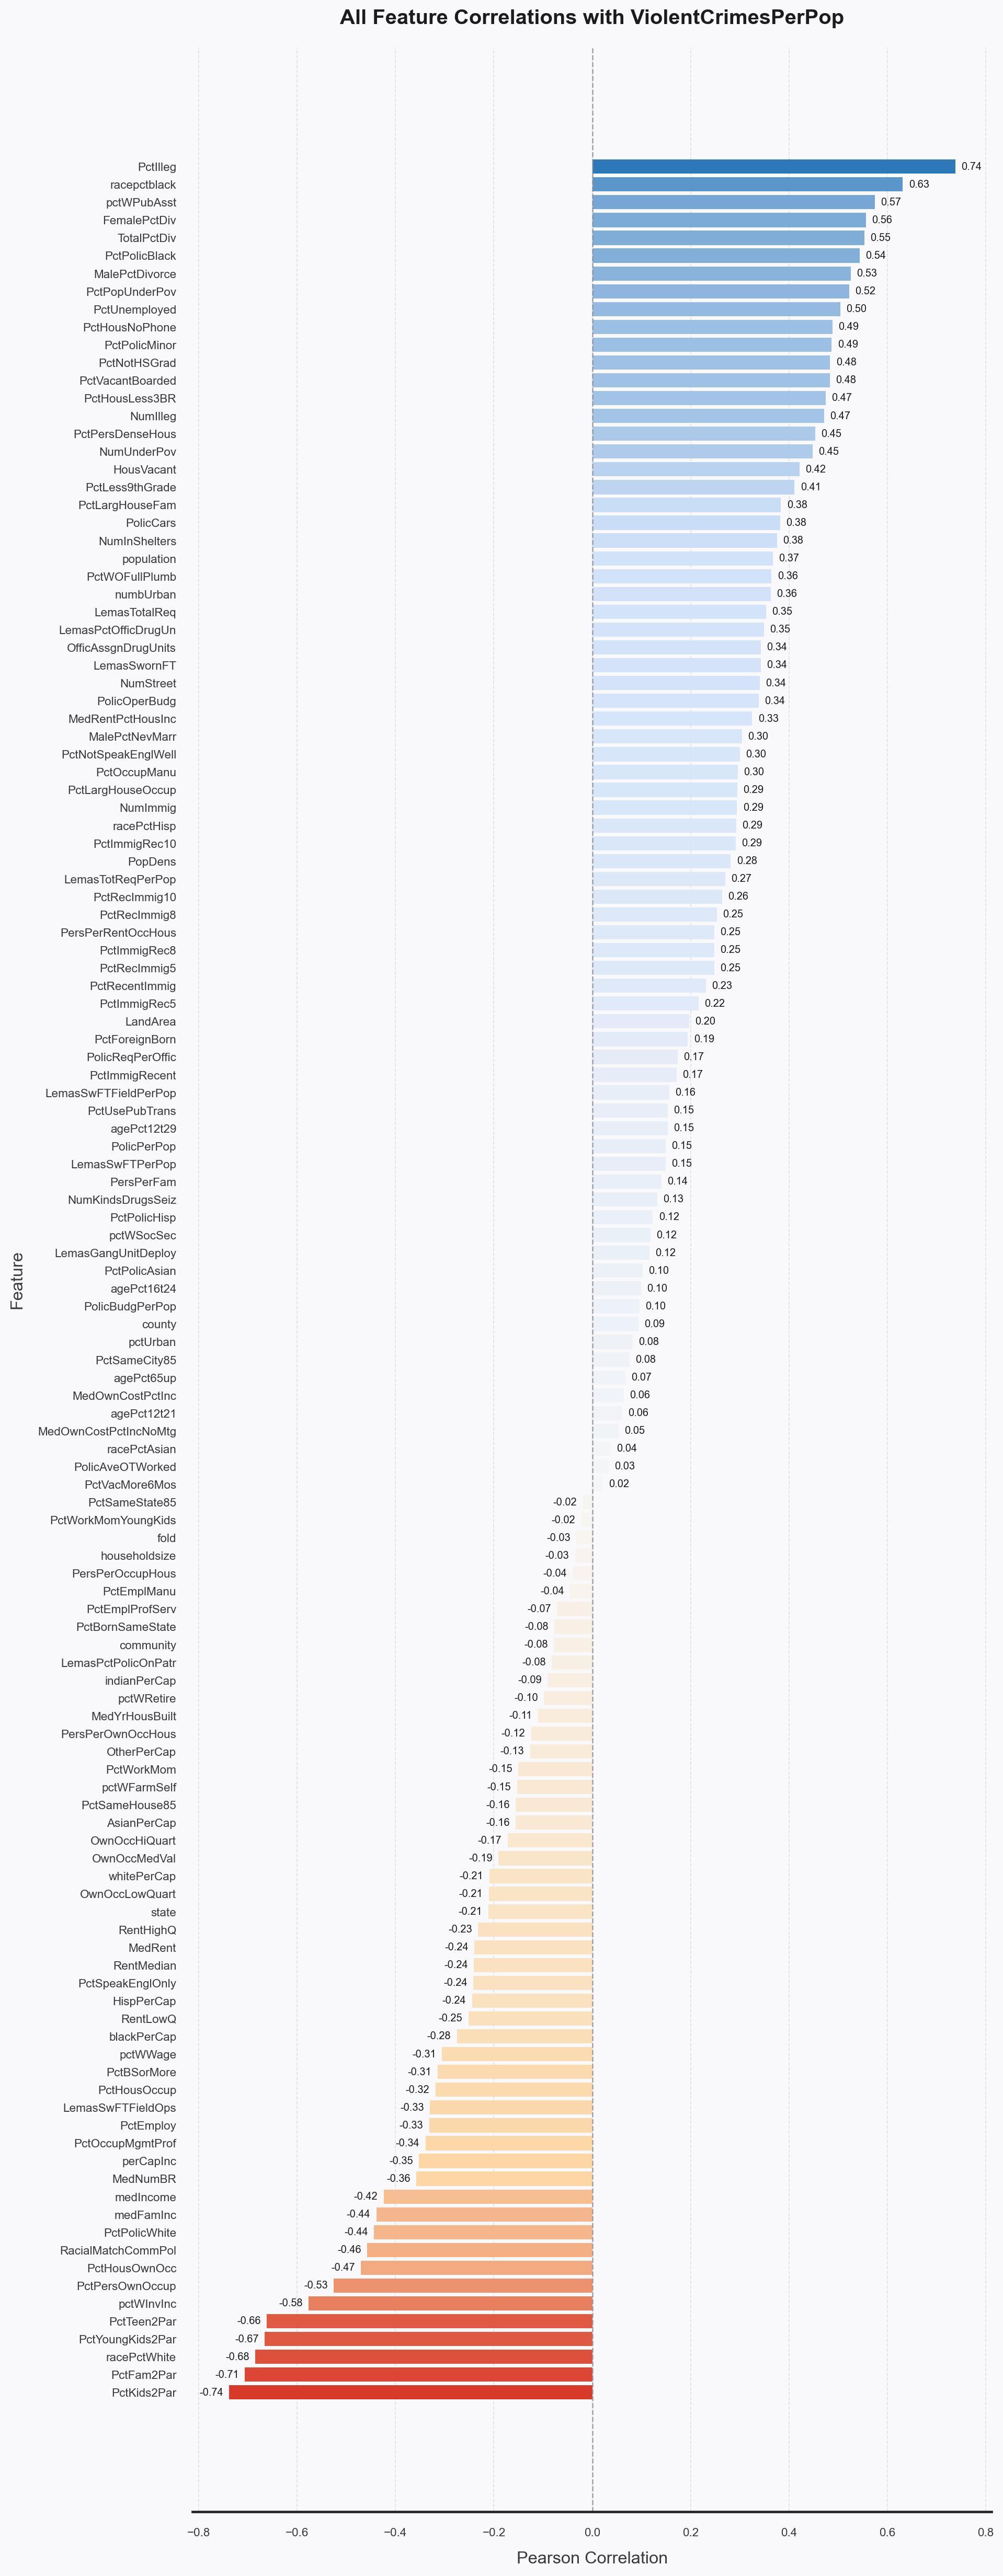

In [2]:
from matplotlib.colors import LinearSegmentedColormap
all_features = [col for col in numeric_df.columns if col != 'ViolentCrimesPerPop']

raw_corr_all = numeric_df[all_features].corrwith(numeric_df['ViolentCrimesPerPop'])
positive_all = raw_corr_all[raw_corr_all >= 0].sort_values(ascending=False)
negative_all = raw_corr_all[raw_corr_all < 0].sort_values(ascending=False)
all_target_corr = pd.concat([positive_all, negative_all])

sns.set_theme(style='white', context='talk')
fig, ax = plt.subplots(figsize=(11, max(10, len(all_target_corr) * 0.22)), dpi=180)
cmap = LinearSegmentedColormap.from_list('corr-gradient-all', ['#d7301f', '#fdd49e', '#f7f7f7', '#d0e1f9', '#2171b5'])
vals = all_target_corr.values
norm = (vals - vals.min()) / (vals.max() - vals.min()) if vals.max() != vals.min() else np.zeros_like(vals)
colors = [cmap(v) for v in norm]
ax.barh(all_target_corr.index, vals, color=colors, edgecolor='none', alpha=0.95)
ax.invert_yaxis()

ax.set_title('All Feature Correlations with ViolentCrimesPerPop', fontsize=16, fontweight='bold', pad=18, color='#1c1c1e')
ax.set_xlabel('Pearson Correlation', fontsize=13, labelpad=10, color='#3a3a3c')
ax.set_ylabel('Feature', fontsize=13, labelpad=10, color='#3a3a3c')
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x', color='#d2d2d7', linestyle='--', linewidth=0.7, alpha=0.6)
ax.axvline(0, color='#8e8e93', linewidth=1, linestyle='--', alpha=0.8)
ax.tick_params(axis='both', colors='#3a3a3c', labelsize=9)

for y_pos, value in enumerate(all_target_corr.values):
    offset = 0.012 if value >= 0 else -0.012
    ha = 'left' if value >= 0 else 'right'
    ax.text(value + offset, y_pos, f"{value:.2f}", va='center', ha=ha, fontsize=8, color='#1c1c1e', fontweight='medium')

fig.patch.set_facecolor('#f9f9fb')
ax.set_facecolor('#f9f9fb')
plt.tight_layout()


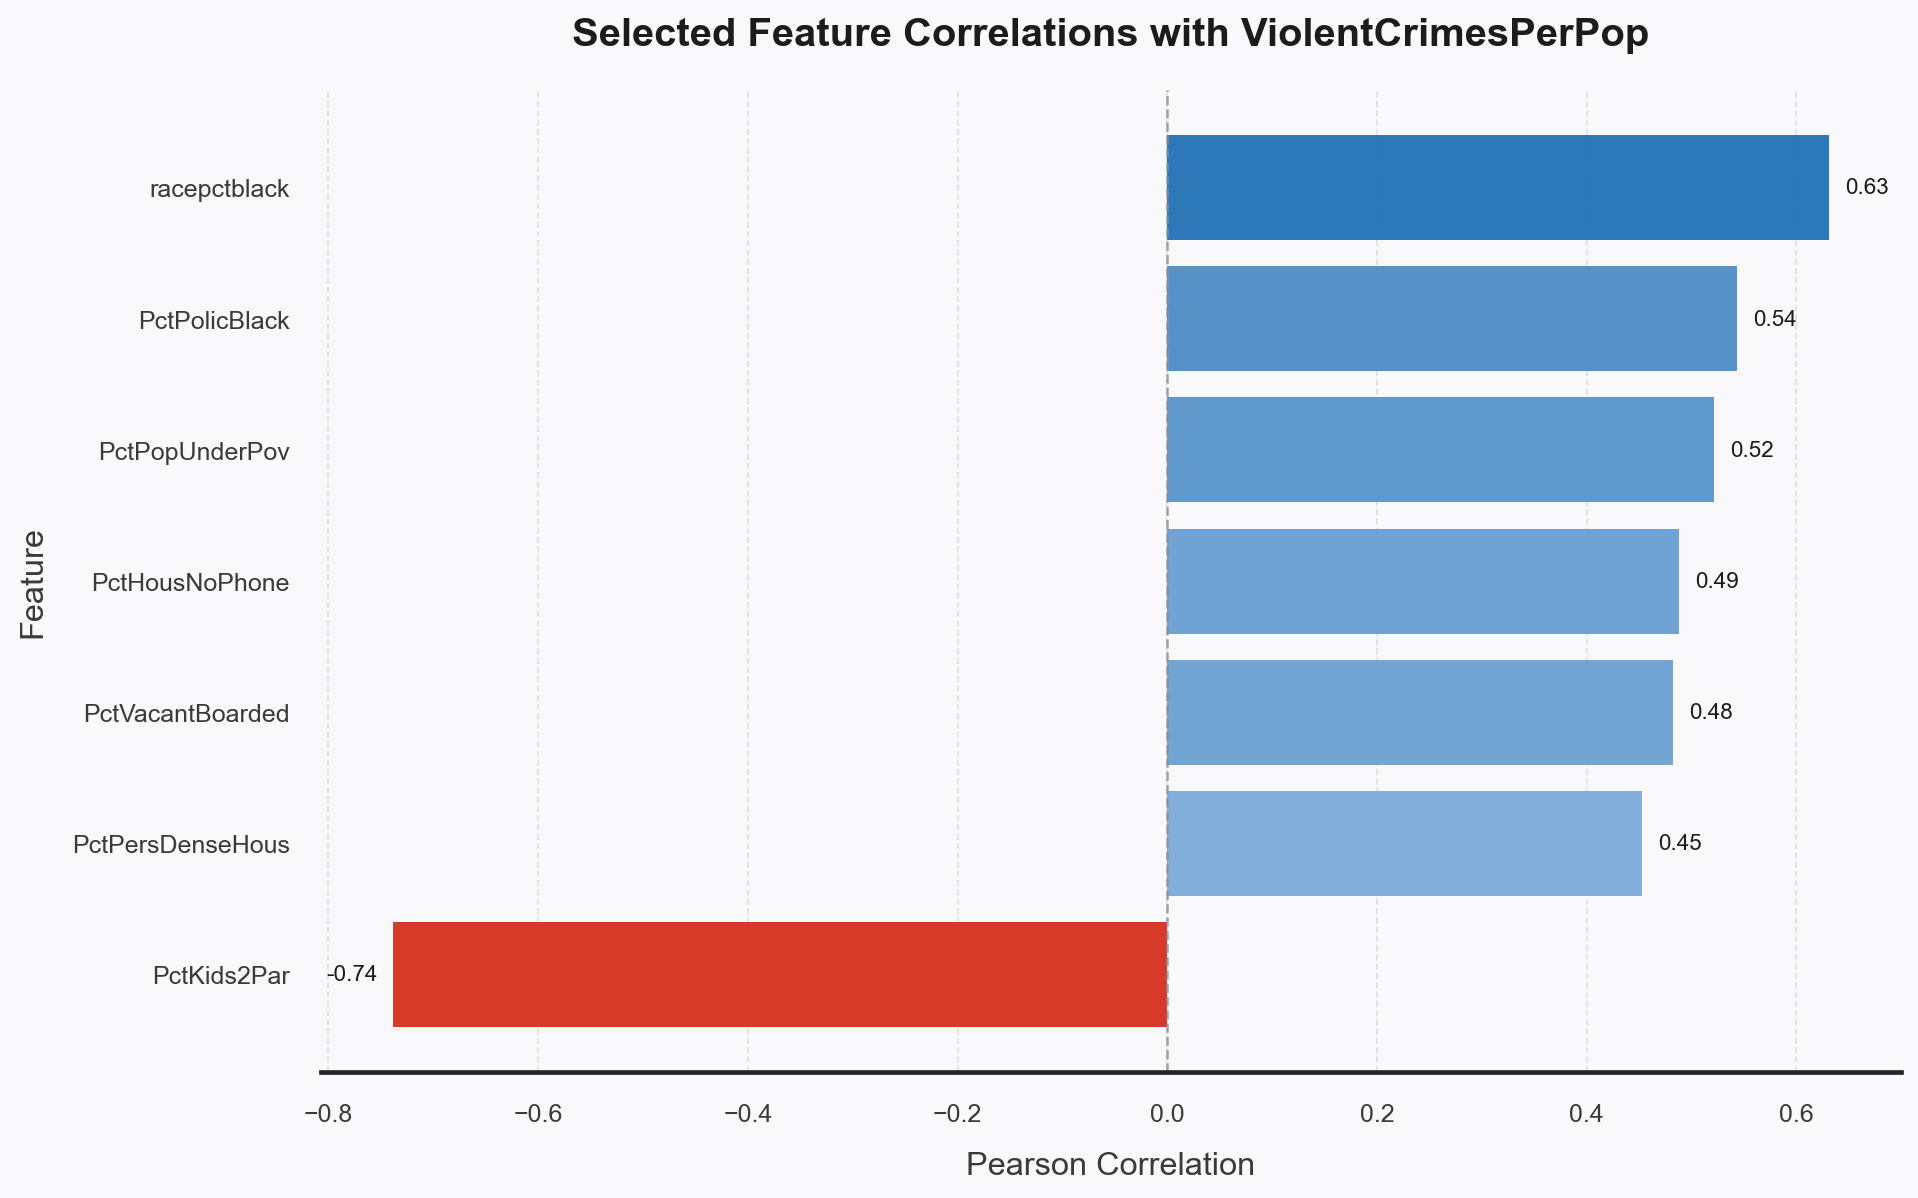

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
selected_features = [
    'racepctblack',
    'PctPolicBlack',
    'PctPopUnderPov',
    'PctKids2Par',
    'PctVacantBoarded',
    'PctPersDenseHous',
    'PctHousNoPhone',
]

missing_features = sorted(set(selected_features) - set(numeric_df.columns))
if missing_features:
    raise KeyError(f"Missing features: {missing_features}. Ensure previous cells ran successfully.")

selected_df = numeric_df[selected_features]
raw_corr = selected_df.corrwith(numeric_df['ViolentCrimesPerPop'])
positive_corr = raw_corr[raw_corr >= 0].sort_values(ascending=False)
negative_corr = raw_corr[raw_corr < 0].sort_values(ascending=False)
selected_target_corr = pd.concat([positive_corr, negative_corr])

corr_summary = selected_target_corr.to_frame('Correlation')

sns.set_theme(style='white', context='talk')
fig, ax = plt.subplots(figsize=(11, max(7, len(selected_target_corr) * 0.32)), dpi=180)
cmap = LinearSegmentedColormap.from_list('corr-gradient', ['#d7301f', '#fdd49e', '#f7f7f7', '#d0e1f9', '#2171b5'])
vals = selected_target_corr.values
norm = (vals - vals.min()) / (vals.max() - vals.min())
colors = [cmap(v) for v in norm]
ax.barh(selected_target_corr.index, vals, color=colors, edgecolor='none', alpha=0.95)
ax.invert_yaxis()

ax.set_title('Selected Feature Correlations with ViolentCrimesPerPop', fontsize=16, fontweight='bold', pad=18, color='#1c1c1e')
ax.set_xlabel('Pearson Correlation', fontsize=13, labelpad=10, color='#3a3a3c')
ax.set_ylabel('Feature', fontsize=13, labelpad=10, color='#3a3a3c')
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x', color='#d2d2d7', linestyle='--', linewidth=0.7, alpha=0.6)
ax.axvline(0, color='#8e8e93', linewidth=1, linestyle='--', alpha=0.8)
ax.tick_params(axis='both', colors='#3a3a3c', labelsize=10)

for y_pos, value in enumerate(selected_target_corr.values):
    offset = 0.015 if value >= 0 else -0.015
    ha = 'left' if value >= 0 else 'right'
    ax.text(value + offset, y_pos, f"{value:.2f}", va='center', ha=ha, fontsize=9, color='#1c1c1e', fontweight='medium')

fig.patch.set_facecolor('#f9f9fb')
ax.set_facecolor('#f9f9fb')
plt.tight_layout()


In [4]:

# Variance Inflation Factors (VIF) for refined feature subset
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_features = [
    'racepctblack',
    'PctPolicBlack',
    'PctPopUnderPov',
    'PctKids2Par',
    'PctVacantBoarded',
    'PctPersDenseHous',
    'PctHousNoPhone',
]

missing_for_vif = sorted(set(vif_features) - set(numeric_df.columns))
if missing_for_vif:
    raise KeyError("Missing features for VIF: {}".format(missing_for_vif))

vif_df = numeric_df[vif_features].copy()
vif_df = vif_df.fillna(vif_df.mean())

vif_values = []
for i, column in enumerate(vif_df.columns):
    vif = variance_inflation_factor(vif_df.values, i)
    vif_values.append((column, vif))

vif_series = pd.Series(dict(vif_values)).sort_values(ascending=False)

vif_summary = vif_series.to_frame('VIF')

display(vif_summary.style.background_gradient(cmap='magma_r', axis=0).format({'VIF': '{:.2f}'}))


,VIF
PctPopUnderPov,9.30
PctPolicBlack,7.72
PctHousNoPhone,6.75
PctKids2Par,4.54
racepctblack,2.97
PctVacantBoarded,2.79
PctPersDenseHous,2.25
